In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [208]:
dfXL = pd.read_csv('dataSaham/EXCL.JK.csv',  parse_dates=['Date'])
dfFren = pd.read_csv('dataSaham/FREN.JK.csv',  parse_dates=['Date'])
dfIsat = pd.read_csv('dataSaham/ISAT.JK.csv',  parse_dates=['Date'])
dfTelkom = pd.read_csv('dataSaham/TLKM.JK.csv',  parse_dates=['Date'])

In [86]:
dfXL.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,2580.0,2720.0,2570.0,2700.0,2700.0,21103300
1,2019-03-19,2700.0,2730.0,2610.0,2650.0,2650.0,10211800
2,2019-03-20,2650.0,2720.0,2610.0,2700.0,2700.0,13744500
3,2019-03-21,2730.0,2760.0,2670.0,2680.0,2680.0,10669000
4,2019-03-22,2700.0,2720.0,2650.0,2660.0,2660.0,2572000
5,2019-03-25,2660.0,2670.0,2550.0,2590.0,2590.0,8303100
6,2019-03-26,2580.0,2700.0,2580.0,2680.0,2680.0,8179200
7,2019-03-27,2690.0,2710.0,2610.0,2680.0,2680.0,5639200
8,2019-03-28,2700.0,2700.0,2610.0,2680.0,2680.0,6086000
9,2019-03-29,2680.0,2700.0,2620.0,2680.0,2680.0,2525300


In [209]:
# PROSES MENGGANTI INDEX DENGAN DATE

dfXL = dfXL.set_index("Date")
dfFren = dfFren.set_index("Date")
dfIsat = dfIsat.set_index("Date")
dfTelkom = dfTelkom.set_index("Date")

In [298]:
# PROSES MENGUBAH KOMPOSISI DATA MENJADI BERURUTAN

def perbaikanDF(df):
    df = df.resample('D').sum()
    df['Volume'] = df['Volume'].fillna(0)
    df = df.fillna(
        method='ffill'
    )
    return df

dfXL_ = perbaikanDF(dfXL['2019-04':'2019-06'])
dfXL_
dfFren_ = perbaikanDF(dfFren['2019-04':'2019-06'])
dfFren_
dfIsat_ = perbaikanDF(dfIsat['2019-04':'2019-06'])
dfIsat_
dfTelkom_ = perbaikanDF(dfTelkom['2019-04':'2019-06'])
dfTelkom_.head(10)

# dfTelkom.index.unique()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,3950.0,3960.0,3900.0,3930.0,3823.229980,28246400.0
2019-04-02,3910.0,3950.0,3910.0,3930.0,3823.229980,35443400.0
2019-04-03,3930.0,3930.0,3930.0,3930.0,3823.229980,0.0
2019-04-04,3980.0,4040.0,3950.0,4030.0,3920.513184,96122100.0
2019-04-05,4020.0,4090.0,4000.0,4060.0,3949.698242,66832600.0
2019-04-06,4020.0,4090.0,4000.0,4060.0,3949.698242,0.0
2019-04-07,4020.0,4090.0,4000.0,4060.0,3949.698242,0.0
2019-04-08,4020.0,4030.0,3940.0,3950.0,3842.686768,73208300.0
2019-04-09,3980.0,4000.0,3910.0,3950.0,3842.686768,88580200.0


## Data saham provider 3 Bulan Terakhir

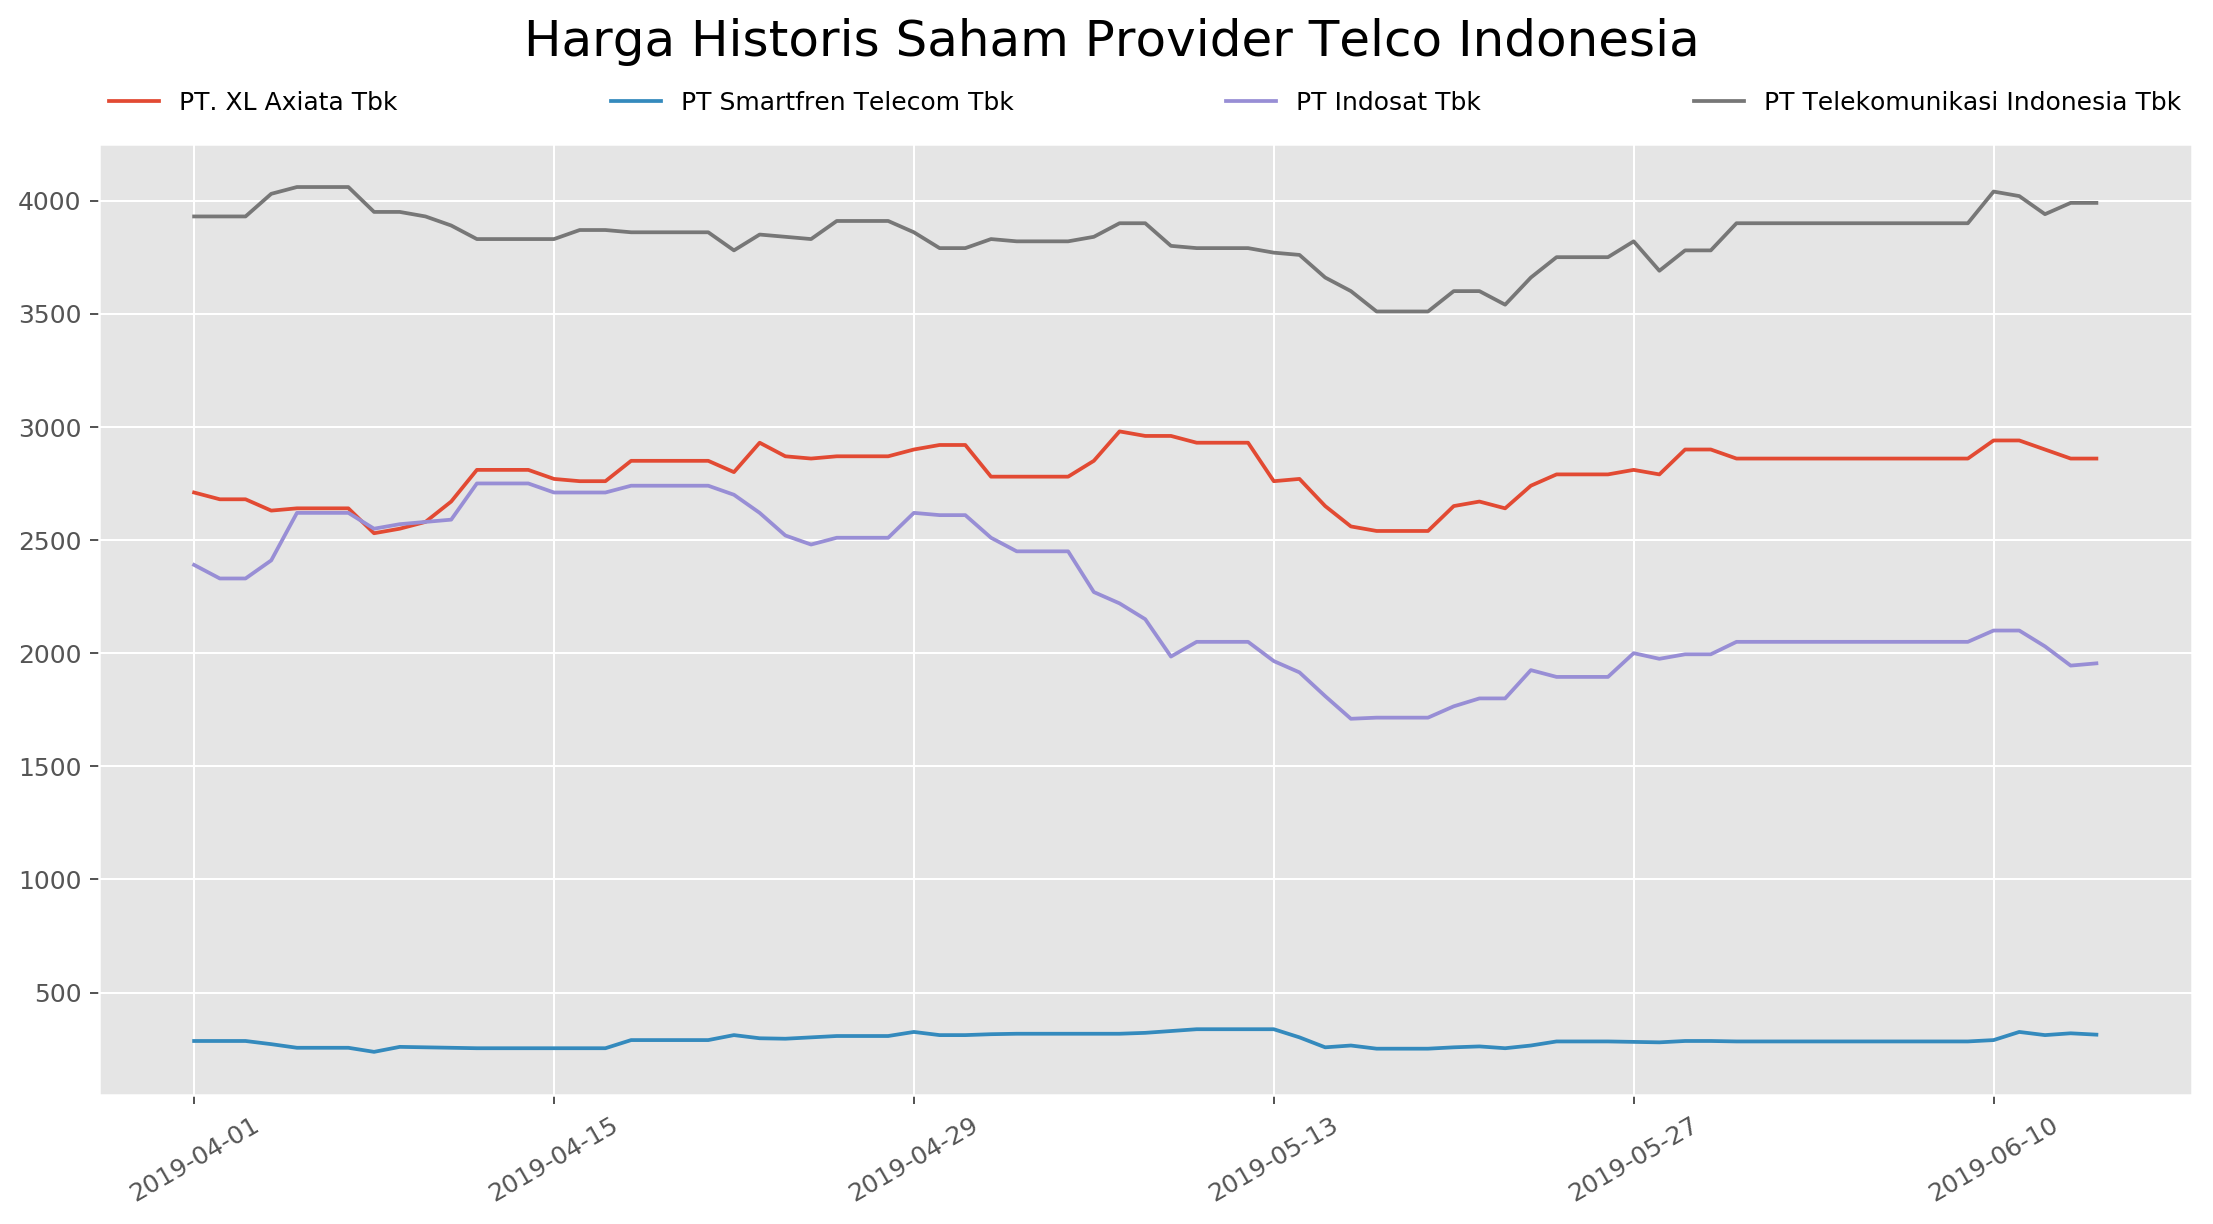

In [303]:
# dfClose = pd.DataFrame([dfXL['close'], dfFren['close'], dfIsat['close'], dfTelkom['close']])
%matplotlib inline

plt.style.use('ggplot')
plt.figure(figsize=(15, 7), dpi= 180, facecolor='w', edgecolor='k')

plt.plot(dfXL_.index, dfXL_['Close'], label="PT. XL Axiata Tbk")
plt.axes()
plt.plot(dfFren_.index, dfFren_.Close, label="PT Smartfren Telecom Tbk")
plt.plot(dfIsat_.index, dfIsat_.Close, label="PT Indosat Tbk")
plt.plot(dfTelkom_.index, dfTelkom_.Close, label="PT Telekomunikasi Indonesia Tbk")
plt.xticks(rotation=30)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0, facecolor="white", edgecolor="white")
plt.suptitle("Harga Historis Saham Provider Telco Indonesia", fontsize=20)
plt.grid(b=True, which='minor', linestyle='-')

plt.show()

## Data Saham Hanya di Bulan April

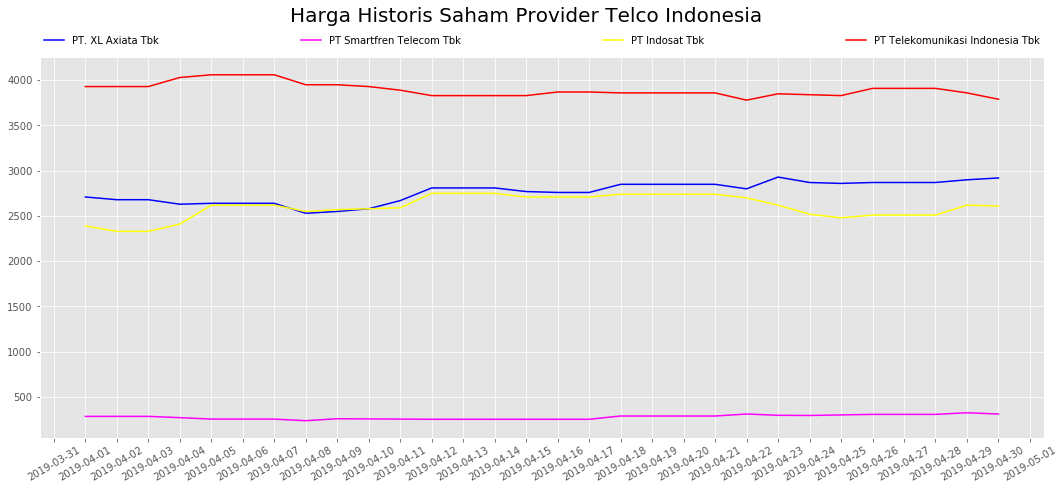

In [304]:
dfXL_4 = perbaikanDF(dfXL['2019-04'])
dfXL_4
dfFren_4 = perbaikanDF(dfFren['2019-04'])
dfFren_4
dfIsat_4 = perbaikanDF(dfIsat['2019-04'])
dfIsat_4
dfTelkom_4 = perbaikanDF(dfTelkom['2019-04'])

fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(18)

ax.plot(dfXL_4.index, dfXL_4['Close'], label="PT. XL Axiata Tbk", color='b')
ax.plot(dfFren_4.index, dfFren_4.Close, label="PT Smartfren Telecom Tbk", color='magenta')
ax.plot(dfIsat_4.index, dfIsat_4.Close, label="PT Indosat Tbk", color="yellow")
ax.plot(dfTelkom_4.index, dfTelkom_4.Close, label="PT Telekomunikasi Indonesia Tbk", color="r")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0, facecolor="white", edgecolor="white")
plt.suptitle("Harga Historis Saham Provider Telco Indonesia", fontsize=20)

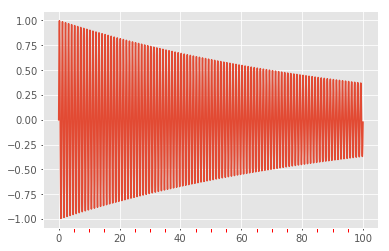

In [260]:

t = np.arange(0.0, 100.0, 0.01)
s = np.sin(2 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=2)
ax.tick_params(which='minor', length=4, color='r')

plt.show()